In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Keras and DL fundamentals

## Keras cheatsheet

In [ ]:
# STEP 1: ARCHITECTURE 
model = models.Sequential()
model.add(layers.Dense(100, input_dim=128, activation='relu'))  # /!\ Must specify input size
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='softmax')) # /!\ Must correspond to the task at hand

# STEP 2: OPTIMIZATION METHODS
model.compile(loss='categorical_crossentropy', optimizer='adam')

# SETP 3: DATA AND FITTING METHODS
model.fit(X, y, batch_size=32, epochs=100)

## The last layer must correspond to the task at hand

In [ ]:
### REGRESSION WITH 1 OUTPUT
model.add(layers.Dense(1, activation='linear'))


### REGRESSION WITH 16 OUTPUTS
model.add(layers.Dense(16, activation='linear'))


### CLASSIFICATION WITH 2 CLASSES
model.add(layers.Dense(1, activation='sigmoid'))


### CLASSIFICATION WITH 14 CLASSES
model.add(layers.Dense(14, activation='softmax'))

# Optimizer-loss-and-fitting

### Compiling

In [ ]:
# REGRESSION
model.compile(loss='mse', 
              optimizer='adam', 
              metrics=['mae'])

# CLASSIFICATION WITH 2 CLASSES
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# CLASSIFICATION WITH N (let's say 14) CLASSES
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy', 'precision'])

### The metrics

In [ ]:
# use strings for quick access
model.compile(metrics=['accuracy', 'precision'])

# use Keras metric objects for fine-tuning
metric = keras.metrics.AUC(
    num_thresholds = 200,
    curve='ROC', # or curve='PR'
)
model.compile(metric=metric)

# Custom metrics
def custom_mse(y_true, y_pred):
    squared_diff = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_diff)

model.compile(metrics=[custom_mse])

### Loss function

In [ ]:
# use strings for quick access
model.compile(loss = "binary_crossentropy")


# use Keras metric objects for fine-tuning
loss = keras.losses.BinaryCrossentropy(...)
model.compile(loss = loss)

# Custom losses
def custom_mse(y_true, y_pred):
    squared_diff = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_diff)

model.compile(loss=custom_mse)

## Optimizer

### Hyperparameters

In [ ]:
model.compile(loss=..., optimizer='adam')

In [ ]:
opt = tensorflow.keras.optimizers.Adam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.99
)
model.compile(loss=..., optimizer=opt)

### epochs number / cross-validation

In [ ]:
# Give validation set explicitly
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val), 
          batch_size=16,
          epochs=100)

In [ ]:
Or, use directly the validation_split keyword:

In [ ]:
history = model.fit(X_train, y_train,
          validation_split=0.3, # /!\ LAST 30% of train indexes 
                                # used as validation
          batch_size=16,
          epochs=100,)
          # shuffle=True) # Training data if shuffled 
                        # at each epoch by default 👌

## Early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping()

model.fit(X_train, y_train, 
          batch_size=16, 
          epochs=1000, 
          validation_split=0.3,
          callbacks=[es])

#  "callback" means that it will be called at the end of each epoch

In [ ]:
es = EarlyStopping(patience=20)

model.fit(X_train, y_train, 
          batch_size=16, 
          epochs=1000, 
          validation_split=0.3,
          callbacks=[es])

In [ ]:
es = EarlyStopping(patience=20, restore_best_weights=True)

model.fit(X_train, y_train, 
          batch_size=16, 
          epochs=1000, 
          validation_split=0.3,
          callbacks=[es])

## Regularization

### Regularizers (L1, L2)

In [ ]:
from tensorflow.keras import regularizers, Sequential, layers

reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

model = Sequential()

model.add(layers.Dense(100, activation='relu', input_dim=13))
model.add(layers.Dense(50, activation='relu', kernel_regularizer=reg_l1))
model.add(layers.Dense(20, activation='relu', bias_regularizer=reg_l2))
model.add(layers.Dense(10, activation='relu', activity_regularizer=reg_l1_l2))
model.add(layers.Dense(1, activation='sigmoid'))

### Dropout layer

In [ ]:
model = Sequential()

model.add(layers.Dense(20, activation='relu', input_dim=56)) 
model.add(layers.Dropout(rate=0.2))  # The rate is the percentage of neurons that are "killed"

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(3, activation='softmax')) 


# —— What is the number of parameters of the Dropout layer? Zero

 ### Pro Tips 💡

## Bonus (new!) Preprocessing Pipelines in Tensorflow

In [ ]:
# Imagine a dataset with one feature scaled differently

X,y = make_regression(n_samples=500, n_features=5, n_targets=3)
X[:,4]= 100 * X[:,4] + 50
pd.DataFrame(X).head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Bad option: No scaling

In [ ]:
model = Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics='mae')

history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=100, batch_size=32, verbose=0)

plot_history(history)

### Option 1: Scale outside of model architecture

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics='mae')

history = model.fit(
    X_train_scaled, y_train, 
    validation_data=(X_test_scaled, y_test),
    epochs=100, batch_size=32, verbose=0)

plot_history(history)

### Option 2: Integrate scaling within model architecture using Normalization layers

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
normalizer = Normalization() # Instantiate a "normalizer" layer
normalizer.adapt(X_train) # "Fit" it on the train set
# Once fitted, you can use it as a function

print(normalizer(X_train).numpy().std())
print(normalizer(X_test).numpy().std())

model = Sequential()

# Use the adapted normalizer as first sequential step
model.add(normalizer)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics='mae')

history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=100, batch_size=32, verbose=0)

plot_history(history)

# Save and load models

In [ ]:
# Let's say that you have a `model`
# You can save it :
models.save_model(model, 'my_model')

# and you can load it somewhere else :
loaded_model = models.load_model('my_model')

# Convolutional Networks

## Network Architecture

### Kernel Weights? - img processing

In [3]:
3 * (3*3) + 1

28

In [4]:
layer_1 = 6 * 3 * (3*3) + 6
layer_2 = 4 * 6 * (3*3) + 4 

layer_1 + layer_2

388

##  Keras syntax

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(225, 225, 3)))
model.add(layers.Conv2D(4, kernel_size=(3), activation='relu')) # kernel_size = 3 <==> (3, 3)
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) 

model.summary() 

## Convolution hyperparameters

In [ ]:
# Default stride = 1
model = Sequential()
model.add(layers.Conv2D(16, (2,2), strides=(1,1), input_shape=(225, 225, 3), activation="relu"))
model.summary()

# Stride = 2     
model = Sequential()
model.add(layers.Conv2D(16, (2,2), strides=(2,2), input_shape=(225, 225, 3), activation="relu"))
model.summary()

## The padding

In [ ]:
# padding='valid' : no-padding, the output is smaller than the input
model = Sequential()
model.add(layers.Conv2D(16, (2,2), input_shape=(225, 225, 3), padding='valid', activation="relu"))
model.summary()


# padding='same' : padded with enough empty pixels to get an output of the same size as the input
          
model = Sequential()
model.add(layers.Conv2D(16, (2,2), input_shape=(225, 225, 3), padding='same', activation="relu"))
model.summary()

## Pooling 

### Max-pooling layer

In [ ]:
model.add(layers.MaxPooling2D(pool_size=(2,2)))

### Average-pooling layer

In [ ]:
model.add(layers.AveragePooling2D(pool_size=(2, 2)))

In [ ]:
model = Sequential()

model.add(layers.Conv2D(16, (2,2), input_shape=(225, 225, 3), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2))) 

model.add(layers.Conv2D(16, (2,2), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2))) 

model.summary()

In [ ]:
# Complete model
model = Sequential()
model.add(layers.Conv2D(16, (2,2), input_shape=(225, 225, 3), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2))) 
model.add(layers.Conv2D(16, (2,2), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2))) 

model.add(layers.Flatten())
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.summary()

In [ ]:
# compare number of parameters with this !

model2 = models.Sequential()
model2.add(layers.Flatten(input_shape=(225, 225, 3)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(6, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid')) 

model2.summary() 

## 💡 Summary

## Real Case: Digits recognition

In [ ]:
# Let's load the famous MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.
X_test = X_test / 255.

print(X_train.shape)
plt.subplot(1,2,1)
plt.imshow(X_train[0], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(X_train[1], cmap="gray");

# Reshape the X to explicitely add a single "color" channel
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)
X_train.shape

# One Hot Encode our Target for TensorFlow processing
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train.shape

# ——— CNN Version 1: Minimal Network
model = Sequential()
model.add(layers.Conv2D(16, (4,4), input_shape=(28, 28, 1), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))



In [ ]:
# ——— CNN Version 2: Common Tricks

model = Sequential()
model.add(layers.Conv2D(16, (3,3), input_shape=(28, 28, 1), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (2,2), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2))) 
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu')) # intermediate layer
model.add(layers.Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_cat_train,
          epochs=1,  # Use early stop in practice
          batch_size=32, 
          verbose=1)

In [ ]:
## We now evaluate on the test data
print(model.evaluate(X_test, y_cat_test, verbose=0))

In [ ]:
# ——— CNN Version III: 

# - Integrate Preprocessing Layers
# - Add Regularization

# Reload raw data
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

model_pipe = Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28,28)),
    layers.experimental.preprocessing.Rescaling(scale=1./255.),
    layers.Conv2D(16, (3,3), padding='same', activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(32, (2,2), padding='same', activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model_pipe.compile(loss='sparse_categorical_crossentropy', # no need to OHE target
              optimizer='adam',
              metrics=['accuracy'])

model_pipe.fit(X_train_raw, y_train_raw, 
          epochs=1,  # Use early stop in practice
          batch_size=32, 
          verbose=1)

## We now evaluate on the test data
print(model_pipe.evaluate(X_test, y_test, verbose=0))

## Insights from the model

In [ ]:
# Let's focus on the first convolution layer
layer_1 = model.layers[0]
layer_1

In [ ]:
# You can access its 16 kernels. Let's print the last one
plt.imshow(layer_1.weights[0][:,:,:,15], cmap='gray');

In [ ]:
# We can also compute the output of the first layer (called it's activation)
# By calling it with a "batch" of images (let's take 10)
batch = X_train[0:10]
activation_1 = layer_1(batch)
activation_1.shape

In [ ]:
# Let's display all 16 channels outputs of the first layer, applied to the first image only

fig, axs = plt.subplots(4,4, figsize=(15,6))
for i in range(4):
    for j in range(4):
        feature_map = activation_1[0,:,:,i+j]
        axs[i,j].imshow(feature_map, cmap='gray')

## CNN Recap

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (5, 5), 
                 padding='same',
                 strides = (1,1),
                 input_shape=(32, 32, 3), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='softmax'))

2021-11-11 10:31:03.644733: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-11 10:31:03.644865: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-11 10:31:11.964859: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-11-11 10:31:11.993383: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-11 10:31:11.993551: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-OQ89CRT): /proc/driver/nvidia/version does not exist
2021-11-11 10:31:11.995073: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary

## Transfer Learning Recap

In [ ]:
# Kernels extract features from images that are not task-specific
# These filters can be reused by loading an existing model
# The last layer have to be changed according to the particular task

from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# This is optional, depending if you have time & will to update the first layers
model.trainable = False

flatten_layer = layers.Flatten()
dense_layer = layers.Dense(100, activation='relu')
prediction_layer = layers.Dense(10, activation='softmax')

model = Sequential([
    model, 
    flatten_layer, 
    dense_layer, 
    prediction_layer
])

# RNN

## Architecture

In [ ]:
import numpy as np

# --- SEQUENCE A (Paris)

day_1 = [10, 25, 50]  # OBSERVATION 1 [Temp, speed, pollution]
day_2 = [13, 10, 70]  # OBSERVATION 2 [Temp, speed, pollution]
day_3 = [ 9,  5, 90]
day_4 = [ 7,  0, 95]

sequence_a = [day_1, day_2, day_3, day_4]

y_a = 110 # Pollution day 5

# --- SEQUENCE B (Berlin)
sequence_b = [[25, 20, 30], [26, 24, 50], [28, 20, 80], [22, 3, 110]]
y_b = 125

# --- SEQUENCE C (London)
sequence_c = [[15, 10, 60], [25, 20, 65], [35, 10, 75], [36, 15, 70]]
y_c = 30

X = np.array([sequence_a, sequence_b, sequence_c]).astype(np.float32)
y = np.array([y_a, y_b, y_c]).astype(np.float32)

print(X.shape)
print(y.shape)

In [ ]:
# ––– It is very easy to code

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.SimpleRNN(units=2, activation='tanh', input_shape=(4,3)))
model.add(layers.Dense(1, activation="linear"))

# The compilation
model.compile(loss='mse', 
              optimizer='rmsprop')  # Recommanded optimizer for RNN
# The fit
model.fit(X, y,
         batch_size=16,
         epochs=10, verbose=0)

# The prediction (one per sequence/city)
model.predict(X)

## Predicting an entire sequence

In [ ]:
model_2 = Sequential()
model_2.add(layers.SimpleRNN(units=2, return_sequences=True, activation='tanh'))
model_2.add(layers.Dense(1, activation='relu'))

In [ ]:
import numpy as np

# --- SEQUENCE A (Paris)

sequence_a = [[10, 25, 50],  # OBS day 1
              [13, 10, 70],  # OBS day 2
              [ 9,  5, 90],  # OBS day 3
              [ 7,  0, 95]]  # OBS day 4

y_a = [70,   # flu cases day 1
       90,   # flu cases day 2
       95,   # flu cases day 3
       110,] # flu cases day 4

# --- SEQUENCE B (Berlin)
sequence_b = [[25, 20, 30], [26, 24, 50], [28, 20, 80], [22, 3, 110]]
y_b = [50, 80, 110, 125]

# --- SEQUENCE C (London)
sequence_c = [[15, 10, 60], [25, 20, 65], [35, 10, 75], [36, 15, 70]]
y_c = [65, 75, 70, 30]

X = np.array([sequence_a, sequence_b, sequence_c]).astype(np.float32)
y = np.array([y_a, y_b, y_c]).astype(np.float32)

print(X.shape)
print(y.shape)

In [ ]:
model_2 = Sequential()

model_2.add(layers.SimpleRNN(2, return_sequences=True))
model_2.add(layers.Dense(1, activation='relu'))

model_2.compile(loss='mse', optimizer='rmsprop')
model_2.fit(X, y, verbose=0)

In [ ]:
print("y_pred shape:", model_2.predict(X).shape)

## Stacking RNNs

In [ ]:
model_stacked = Sequential()

model_stacked.add(layers.SimpleRNN(10, return_sequences=True, input_shape=((4, 3)))) 
model_stacked.add(layers.SimpleRNN(3, return_sequences=False))
model_stacked.add(Dense(1, activation='relu'))

model_stacked.summary()

## RNN Zoology

In [ ]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU

###  Simple RNN  ###
model = Sequential()
model.add(SimpleRNN(units=10, activation='tanh'))  

###  LSTM   ###
model = Sequential()
model.add(LSTM(units=10, activation='tanh'))

###  GRU ###
model = Sequential()
model.add(GRU(units=10, activation='tanh'))

# Compile with 'rmsprop' rather than 'adam' (recommended)
model.compile(loss='mse',
              optimizer='rmsprop')  

## Variations

### Applications cheat sheet

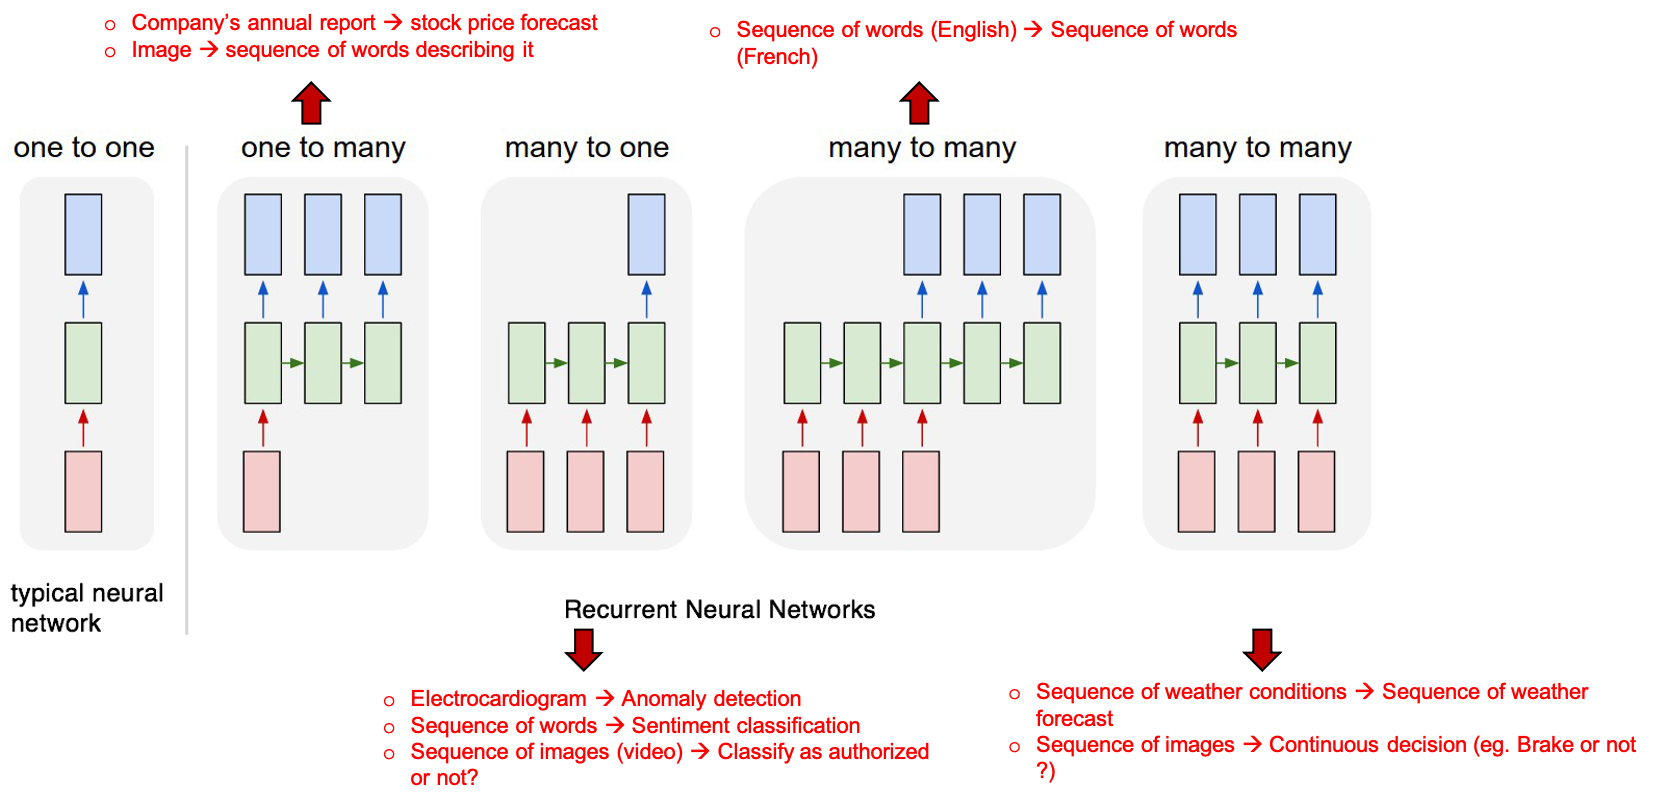

In [11]:
from IPython.display import Image
Image("many_to_many2.png")

## Appendix (1): Input sequences of different lenghts? 🤔

In [ ]:
import numpy as np

# --- SEQUENCE 1 (Paris) ---

sequence_1 = [[10, 25, 50],  # OBS day 1
              [13, 10, 70],  # OBS day 2
              [ 9,  5, 90],  # OBS day 3
              [ 7,  0, 95]]  # OBS day 4

y_1 = 110 # pollution day 5 

# --- SEQUENCE 2 (Berlin) ---
sequence_2 = [[25, 20, 30],
              [26, 24, 50]]

y_2 = 125 # pollution day 3

# --- SEQUENCE 3 (London)
sequence_3 = [[15, 10, 60],
              [25, 20, 65],
              [35, 10, 75]]
y_3 = 30 # Pollution day 4

X = [sequence_1, sequence_2, sequence_3]
X = [np.array(_) for _ in X]
y = np.array([y_1, y_2, y_3]).astype(np.float32)

In [ ]:
model = Sequential()
model.add(SimpleRNN(1, activation='tanh')) 
model.add(Dense(1, activation="relu"))

# The compilation
model.compile(loss='mse', optimizer='rmsprop')

# The fit
model.fit(X, y, batch_size=16, epochs=10)

## Padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad = pad_sequences(X, dtype='float32') # int32 by default
X_pad

In [ ]:
X_pad = pad_sequences(X, dtype='float32', padding='post', value=-1000)
X_pad

## Masking Layer

In [ ]:
from tensorflow.keras.layers import Masking

In [ ]:
# –– Data
X = pad_sequences(X, dtype='float32', padding='post', value=-1000)
# X.shape == (3,4,3)

# –– Model
model = Sequential()
model.add(layers.Masking(mask_value=-1000, input_shape=(4,3)))
model.add(layers.SimpleRNN(units=2, activation='tanh'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# –– Compilation
model.compile(loss='mse', 
              optimizer='rmsprop') # Use `rmsprop`

# –– Fit
model.fit(X, y);

# NLP

## Tokenizer

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
### Let's write some mock-up data
def get_mock_up_data():
    sentence_1 = 'Deep learning is super easy'
    sentence_2 = 'Deep learning was super bad and too long'
    sentence_3 = 'This is the best lecture of the camp!'

    X = [sentence_1, sentence_2, sentence_3]
    y = np.array([1., 0., 0.])

    ### Let's tokenize the vocabulary 
    tk = Tokenizer()
    tk.fit_on_texts(X)
    vocab_size = len(tk.word_index)
    print(f'There are {vocab_size} different words in your corpus')
    X_token = tk.texts_to_sequences(X)

    ### Pad your inputs
    X_pad = pad_sequences(X_token, dtype='float32', padding='post')
    
    return X_pad, y, vocab_size

X_pad, y, vocab_size = get_mock_up_data()
print("X_pad.shape", X_pad.shape)
X_pad

## layers.Embedding

In [5]:
### Let's build the Neural network now
from tensorflow.keras import layers, Sequential

# Size of your embedding space = size to represent each word
embedding_size = 100

model = Sequential()
model.add(layers.Embedding(
    input_dim=vocab_size+1, # 16 +1 for the 0 padding
    input_length=8, # Max_sentence_length (optional, for model summary)
    output_dim=embedding_size,# 100
    mask_zero=True, # Included masking layer :)
))

model.add(layers.LSTM(20))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

2021-11-12 15:16:44.595872: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-12 15:16:44.595927: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-12 15:16:47.711588: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-11-12 15:16:47.723526: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-12 15:16:47.723549: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-OQ89CRT): /proc/driver/nvidia/version does not exist
2021-11-12 15:16:47.724076: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary

NameError: name 'vocab_size' is not defined

## Word2Vec

In [ ]:
### Let's get some text first

import tensorflow_datasets as tfds

train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                            batch_size=-1, as_supervised=True)

train_sentences, train_labels = tfds.as_numpy(train_data)
test_sentences, test_labels = tfds.as_numpy(test_data)

# Let's check two sentences
train_sentences[0:2]

# We have to convert the sentences into list of words! The computer won't do it for us

In [ ]:
# Let's convert the list of sentences to list of list of words with a Keras utils

from tensorflow.keras.preprocessing.text import text_to_word_sequence

X_train = [text_to_word_sequence(_.decode("utf-8")) for _ in train_sentences]
X_test = [text_to_word_sequence(_.decode("utf-8")) for _ in test_sentences]

X_train[0:2]

In [ ]:
from gensim.models import Word2Vec

# This line trains an entire embedding for the words in your train set
word2vec = Word2Vec(sentences=X_train, vector_size=10)

In [ ]:
# Let's take a look at the representation of any word

word2vec.wv['hello']

In [ ]:
# Now let's look at the 10 closest word to `movie`

word2vec.wv.most_similar('movie', topn=10)

In [ ]:
# To control the size of the embedding space, you just have to set-up the `vector_size` keyword

word2vec = Word2Vec(sentences=X_train[:1000], vector_size=50) # We keep the training short by taking only 1000 sentences

len(word2vec.wv['computer'])

In [ ]:
# The Word2Vec learns representation for words that are present more than `min_count` number of times
# This is to prevent to learn representations based on a few exemples only

word2vec = Word2Vec(sentences=X_train[:1000], vector_size=50, min_count=5)

try: 
    len(word2vec.wv['columbian'])
except:
    print("word seen only less than 5 times, excluded from corpus")

In [ ]:
# As mentionned ealier, Word2vec trains an internal Neural network whose goal is to predict a word in a corpus
# based on the words around it. This part of the sentence is called the window.
# Its size corresponds to the number of word around word W used to predict this word W


word2vec = Word2Vec(sentences=X_train[:10000], vector_size=100, window=5, min_count=1)

### Pre-trained Word2Vec (transfer learning)

In [ ]:
# Instead of learning it on your training set (especially if it is very small), you can directly 
# load a pretrained embedding

import gensim.downloader

print(list(gensim.downloader.info()['models'].keys()))

model_wiki = gensim.downloader.load('glove-wiki-gigaword-50')

In [ ]:
model_wiki.most_similar('movie', topn=10)

## 1D convolutions

In [4]:
# RNN
rnn = Sequential([
    layers.Embedding(input_dim=5000, input_length=20, output_dim=30, mask_zero=True),
    layers.LSTM(20),
    layers.Dense(1, activation="sigmoid")
])


# Conv1D
cnn = Sequential([
    layers.Embedding(input_dim=5000, input_length=20, output_dim=30, mask_zero=True),
    layers.Conv1D(20, kernel_size=3),
    layers.Flatten(),
    layers.Dense(1, activation="sigmoid"),
])

NameError: name 'Sequential' is not defined